In [1]:
import os
import sys
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw_ndim

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

In [2]:
output_folder = os.path.join(ROOT_DIR, "outputs", "D2_driver")
trips_file = os.path.join(output_folder, "trip_list.p")
trip_list = pickle.load(open(trips_file, "rb"))

In [3]:
def sample_trip_list(trip_list, sample_size, window_size):
    sample_obs_list = []
    for i in range(sample_size):
        sample_trip = random.choice(trip_list)
        sample_trip_size = sample_trip.get_trip_size()
        sample_pointer = random.randrange(0, sample_trip_size-window_size)
        sample_window = list(range(sample_pointer, sample_pointer+window_size))
        sample_obs = sample_trip.get_windown_obs(sample_window)
        sample_obs_list.append(sample_obs)
    return sample_obs_list

In [4]:
sample_size = 500
window_size = 15
sample_obs_list = sample_trip_list(trip_list, sample_size, window_size)
dist_matrix = dtw_ndim.distance_matrix(sample_obs_list, window=1)
dist_lst = np.extract(dist_matrix < np.inf, dist_matrix)

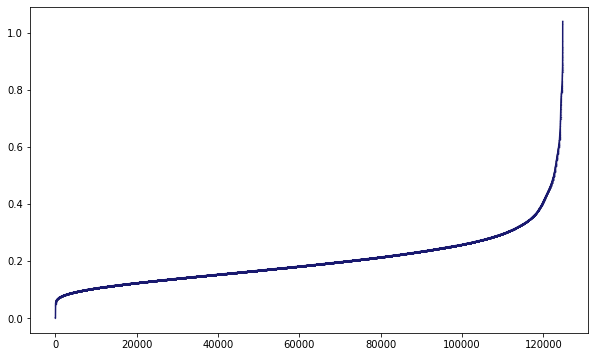

In [5]:
dist_lst.sort()
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(dist_lst)), dist_lst, marker='.', linestyle=None, markersize=0.1, color="midnightblue")
plt.show()

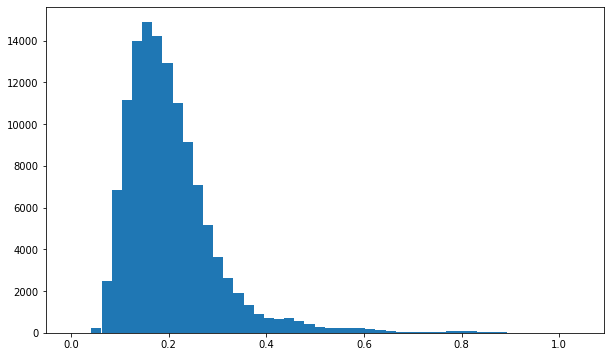

In [6]:
plt.figure(figsize=(10,6))
plt.hist(dist_lst, bins=50)
plt.show()

In [7]:
np.percentile(dist_lst, 20)

0.13131467718590062

In [8]:
np.percentile(dist_lst, 10)

0.10997922783261593

In [9]:
np.percentile(dist_lst, 5)

0.09556019045606805

In [10]:
np.percentile(dist_lst, 1)

0.07470324247045076

In [11]:
np.percentile(dist_lst, 0.5)

0.06931781970350243